<h1>Naive Bayes Spam Filter</h1>

<p>Bayes Theorem can give us the probability that a message is spam S for a given event E</p>

<h1>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h1>

<p>Where:</p>
<p>$P\left(S\middle|\ E\right)$, the probability that the message is spam given the event occurred.</p>
<p>$P\left(S\right)$, the prior probability that a message is spam.</p>
<p>$P\left(\lnot S\right)$, the prior probability that a message is not spam.  </p>

<p>$P\left(E\middle|\ S\right)$, the probability that event E occurs in a spam emails.</p>

<p>$P\left(E|\lnot S\right)$, the probability that event E occurs in non-spam emails.</p>

<h3>The Implementation</h3>
<p>I have kept the implementation quite simple and therefore not accounted for things like filtering small often used words, nor does the implementation calculate probabilities of a word in the frequency list not appearing in spam.  I have also filtered things like telephone numbers, which could be used to identify spam. </p>


<h3>1.  Read the dataset into a dataframe and explore</h3>
<p>[1 Mark]</p>

In [1]:
import pandas as pd
df = pd.read_csv("spam.csv", encoding = "latin-1")
pd.set_option('display.max_rows', None)
df

v1                                                 v2  \
0      ham  Go until jurong point, crazy.. Available only ...   
1      ham                      Ok lar... Joking wif u oni...   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3      ham  U dun say so early hor... U c already then say...   
4      ham  Nah I don't think he goes to usf, he lives aro...   
5     spam  FreeMsg Hey there darling it's been 3 week's n...   
6      ham  Even my brother is not like to speak with me. ...   
7      ham  As per your request 'Melle Melle (Oru Minnamin...   
8     spam  WINNER!! As a valued network customer you have...   
9     spam  Had your mobile 11 months or more? U R entitle...   
10     ham  I'm gonna be home soon and i don't want to tal...   
11    spam  SIX chances to win CASH! From 100 to 20,000 po...   
12    spam  URGENT! You have won a 1 week FREE membership ...   
13     ham  I've been searching for the right words to tha...   
14     ham                I HAVE A DATE ON SUNDAY WITH WILL!!   
15    spam  XXXMobileMovieClub: To use your credit, click ...   
16     ham                         Oh k...i'm watching here:)   
17     ham  Eh u remember how 2 spell his name... Yes i di...   
18     ham  Fine if thatåÕs the way u feel. ThatåÕs the wa...   
19    spam  England v Macedonia - dont miss the goals/team...   
20     ham          Is that seriously how you spell his name?   
21     ham  IÛ÷m going to try for 2 months ha ha only joking   
22     ham  So Ì_ pay first lar... Then when is da stock c...   
23     ham  Aft i finish my lunch then i go str down lor. ...   
24     ham  Ffffffffff. Alright no way I can meet up with ...   
25     ham  Just forced myself to eat a slice. I'm really ...   
26     ham                     Lol your always so convincing.   
27     ham  Did you catch the bus ? Are you frying an egg ...   
28     ham  I'm back &amp; we're packing the car now, I'll...   
29     ham  Ahhh. Work. I vaguely remember that! What does...   
30     ham  Wait that's still not all that clear, were you...   
31     ham  Yeah he got in at 2 and was v apologetic. n ha...   
32     ham                      K tell me anything about you.   
33     ham  For fear of fainting with the of all that hous...   
34    spam  Thanks for your subscription to Ringtone UK yo...   
35     ham  Yup... Ok i go home look at the timings then i...   
36     ham    Oops, I'll let you know when my roommate's done   
37     ham                       I see the letter B on my car   
38     ham                        Anything lor... U decide...   
39     ham  Hello! How's you and how did saturday go? I wa...   
40     ham  Pls go ahead with watts. I just wanted to be s...   
41     ham  Did I forget to tell you ? I want you , I need...   
42    spam  07732584351 - Rodger Burns - MSG = We tried to...   
43     ham                                WHO ARE YOU SEEING?   
44     ham  Great! I hope you like your man well endowed. ...   
45     ham                   No calls..messages..missed calls   
46     ham      Didn't you get hep b immunisation in nigeria.   
47     ham                    Fair enough, anything going on?   
48     ham  Yeah hopefully, if tyler can't do it I could m...   
49     ham  U don't know how stubborn I am. I didn't even ...   
50     ham  What you thinked about me. First time you saw ...   
51     ham  A gram usually runs like  &lt;#&gt; , a half e...   
52     ham  K fyi x has a ride early tomorrow morning but ...   
53     ham  Wow. I never realized that you were so embaras...   
54    spam  SMS. ac Sptv: The New Jersey Devils and the De...   
55     ham  Do you know what Mallika Sherawat did yesterda...   
56    spam  Congrats! 1 year special cinema pass for 2 is ...   
57     ham                 Sorry, I'll call later in meeting.   
58     ham                             Tell where you reached   
59     ham           Yes..gauti and sehwag out of odi series.   
60     ham  Your gonna have to pick up a $1

<h3>2. Clean the data</h3>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Category</th>
      <th>Message</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>ham</td>
      <td>go until jurong point crazy available only in ...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>ham</td>
      <td>ok lar joking wif u oni</td>
    </tr>
    <tr>
      <th>2</th>
      <td>spam</td>
      <td>free entry in  a wkly comp to win fa cup final...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>ham</td>
      <td>u dun say so early hor u c already then say</td>
    </tr>
    <tr>
      <th>4</th>
      <td>ham</td>
      <td>nah i dont think he goes to usf he lives aroun...</td>
    </tr>
  </tbody>
</table>

[1 Marks]

In [2]:
import re

def cleaning(text):
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    cleaned_text = cleaned_text.lower()
    return cleaned_text

df['Message'] = df['v2'].apply(cleaning)
df.rename(columns={'v1': 'Category'}, inplace=True)

clean = df[['Category','Message']]
clean

Category                                            Message
0         ham  go until jurong point crazy available only in ...
1         ham                            ok lar joking wif u oni
2        spam  free entry in  a wkly comp to win fa cup final...
3         ham        u dun say so early hor u c already then say
4         ham  nah i dont think he goes to usf he lives aroun...
5        spam  freemsg hey there darling its been  weeks now ...
6         ham  even my brother is not like to speak with me t...
7         ham  as per your request melle melle oru minnaminun...
8        spam  winner as a valued network customer you have b...
9        spam  had your mobile  months or more u r entitled t...
10        ham  im gonna be home soon and i dont want to talk ...
11       spam  six chances to win cash from  to  pounds txt c...
12       spam  urgent you have won a  week free membership in...
13        ham  ive been searching for the right words to than...
14        ham                  i have a date on sunday with will
15       spam  xxxmobilemovieclub to use your credit click th...
16        ham                               oh kim watching here
17        ham  eh u remember how  spell his name yes i did he...
18        ham  fine if thats the way u feel thats the way its...
19       spam  england v macedonia  dont miss the goalsteam n...
20        ham           is that seriously how you spell his name
21        ham      im going to try for  months ha ha only joking
22        ham      so  pay first lar then when is da stock comin
23        ham  aft i finish my lunch then i go str down lor a...
24        ham  ffffffffff alright no way i can meet up with y...
25        ham  just forced myself to eat a slice im really no...
26        ham                      lol your always so convincing
27        ham  did you catch the bus  are you frying an egg  ...
28        ham  im back amp were packing the car now ill let y...
29        ham  ahhh work i vaguely remember that what does it...
30        ham  wait thats still not all that clear were you n...
31        ham  yeah he got in at  and was v apologetic n had ...
32        ham                       k tell me anything about you
33        ham  for fear of fainting with the of all that hous...
34       spam  thanks for your subscription to ringtone uk yo...
35        ham  yup ok i go home look at the timings then i ms...
36        ham       oops ill let you know when my roommates done
37        ham                       i see the letter b on my car
38        ham                              anything lor u decide
39        ham  hello hows you and how did saturday go i was j...
40        ham  pls go ahead with watts i just wanted to be su...
41        ham  did i forget to tell you  i want you  i need y...
42       spam    rodger burns  msg  we tried to call you re y...
43        ham                                 who are you seeing
44        ham  great i hope you like your man well endowed i ...
45        ham                       no callsmessagesmissed calls
46        ham        didnt you get hep b immunisation in nigeria
47        ham                      fair enough anything going on
48        ham  yeah hopefully if tyler cant do it i could may...
49        ham  u dont know how stubborn i am i didnt even wan...
50        ham  what you thinked about me first time you saw m...
51        ham  a gram usually runs like  ltgt  a half eighth ...
52        ham  k fyi x has a ride early tomorrow morning but ...
53        ham  wow i never realized that you were so embarass...
54       spam  sms ac sptv the new jersey devils and the detr...
55        ham  do you know what mallika sherawat did yesterda...
56       spam  congrats  year special cinema pass for  is you...
57        ham                    sorry ill call later in meeting
58        ham                             tell where you reached
59        ham              yesgauti and sehwag out of odi series
60        ham  your gonna have to pick u

<h3>3. Split the Data</h3>

<p>[1 Mark]</p>

In [3]:
from sklearn.model_selection import train_test_split

#70% train
train_data, other = train_test_split(clean, test_size=0.3)
#15% validation + test each
validation_data, test_data = train_test_split(other, test_size=0.5)


<h3>4. Create a Word Frequency DataFrame</h3>

<p>[2 Marks]</p>

In [4]:

import pandas as pd

spam_dict = {}  # word: num occurrences in spam
ham_dict = {}   # word: num occurrences in ham
word_list = []  # all unique words

for index, row in train_data.iterrows():
    message = row['Message']
    category = row['Category']
    words_in_message = message.split()  
    
    word_list.extend(words_in_message)

word_list = list(set(word_list))
    
for word in word_list:

    num_rows_ham_word = len(train_data[(train_data['Category'] == 'ham') & (train_data['Message'].str.contains(word))])
    num_rows_spam_word = len(train_data[(train_data['Category'] == 'spam') & (train_data['Message'].str.contains(word))])
    spam_dict[word] = num_rows_spam_word
    ham_dict[word] = num_rows_ham_word


data = {'Word': word_list, '#Spam': 0, '#Ham': 0}
word_counts_df = pd.DataFrame(data)

for word in word_list:
    word_counts_df.loc[word_counts_df['Word'] == word, '#Spam'] = spam_dict[word]
    word_counts_df.loc[word_counts_df['Word'] == word, '#Ham'] = ham_dict[word]

word_counts_df

Word  #Spam  #Ham
0                                      lovable      0     7
1                                       expert      0     1
2                                     misstake      0     1
3                                        polyh      1     0
4                                      theater      0     1
5                                       lotsly      0     1
6                                    dartboard      1     0
7                                         swan      0     2
8                                        floor      0     2
9                                       beauty      0     2
10                                         svc      1     0
11                                        ksry      0     1
12                                 lkpoboxhpfl      3     0
13                                         maq      1     0
14                                       anjie      0     1
15                                   aeroplane      0     2
16                                         zed     11     5
17                                        itll      0     2
18                                      server      0     1
19                                  convincing      0     2
20                                        rock      1    11
21                                       coast      0     1
22                                       donno      0     2
23                                 annoncement      1     0
24                                       bcums      0     1
25                                       pmsgp      1     0
26                                        gibe      0     1
27                                        teju      0     1
28                                     schools      0     2
29                                 disappeared      0     1
30                                        prem      1     2
31                                     managed      0     1
32                                        rael      0     1
33                                  completing      0     1
34                                    bitching      0     1
35                                   applebees      0     1
36                                  accounting      0     1
37                                     seekers      0     1
38                                      darker      0     1
39                                       timin      0     3
40                                        love      8   144
41                                    accident      2     2
42                                      washob      0     1
43                                    youdoing      0     1
44                                       shirt      0     6
45                                     realize      0     6
46                                       syrup      0     1
47                                     lacking      0     1
48                                          jx      1     0
49                                   hospitals      0     2
50                                   dogbreath      0     1
51                                        deyi      0     1
52                                          as    175   684
53                                  footprints      0     1
54                                    radiator      0     1
55                                        mini      1     5
56                                     recount      0     1
57                                      franxx      0     1
58                                    republic      0     1
59                                    whatever      0    12
60                                    vomiting      0     2
61                                     network     22     6
62                                     satlove      0     1
63                                     wellyou      0     1
64                                        gays      0     1
65                                         amy      1     1
66                    

<h3>5. Visualise the Data</h3>

<p>[1 Marks]</p>



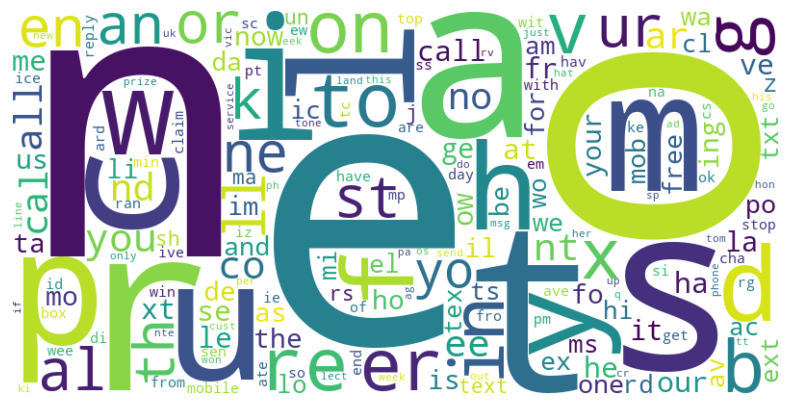

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_freq = dict(zip(word_counts_df['Word'], word_counts_df['#Spam']))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h3>6.  Calculate $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$</h3>

</p>[2 Marks]</p>


In [6]:
data = {'Word': word_list, 'P(E|S)': 0, 'P(E|¬S)': 0}
word_prob = pd.DataFrame(data)

total_spam_msgs = len(train_data[(train_data['Category'] == 'spam')])
total_ham_msgs = len(train_data[(train_data['Category'] == 'ham')])

word_prob['P(E|S)'] = (word_counts_df['#Spam'] + 0.5) / (total_spam_msgs + 0.5*2)
word_prob['P(E|¬S)'] = (word_counts_df['#Ham'] + 0.5) / (total_ham_msgs + 0.5*2)

word_prob = word_prob.sort_values(by='P(E|S)', ascending=False)
word_prob

Word    P(E|S)   P(E|¬S)
3700                                         e  0.997115  0.951656
5394                                         o  0.997115  0.949290
2570                                         n  0.991346  0.904938
1211                                         t  0.987500  0.922679
5167                                         s  0.985577  0.840775
1712                                         r  0.981731  0.839592
782                                          a  0.977885  0.927705
6145                                         i  0.974038  0.912626
337                                          u  0.964423  0.788439
1287                                         l  0.964423  0.774246
959                                          c  0.960577  0.622856
4931                                         m  0.933654  0.721614
5885                                         p  0.925962  0.510497
6925                                         h  0.924038  0.839888
3452                                         y  0.918269  0.750296
1834                                         w  0.910577  0.673418
4181                                         d  0.897115  0.725163
5537                                         f  0.793269  0.495417
2432                                        to  0.775962  0.362360
1945                                         g  0.774038  0.669870
1523                                        in  0.739423  0.570816
4336                                        re  0.722115  0.424157
2943                                         b  0.699038  0.492460
5214                                        on  0.697115  0.379213
6470                                         v  0.674038  0.369752
4843                                        er  0.670192  0.396659
2507                                         x  0.631731  0.105115
6430                                        al  0.629808  0.293170
895                                         ur  0.618269  0.220727
6215                                        st  0.608654  0.278386
3036                                        ll  0.599038  0.348462
6773                                        or  0.595192  0.352011
4562                                        an  0.577885  0.425636
1517                                        th  0.568269  0.527942
2340                                        en  0.558654  0.341957
4467                                         k  0.556731  0.497782
141                                         ne  0.545192  0.241130
6792                                        yo  0.543269  0.334861
4348                                       you  0.541346  0.323034
3009                                        co  0.533654  0.191455
615                                         nt  0.506731  0.281342
3907                                        ee  0.499038  0.221023
6643                                       all  0.495192  0.156268
4346                                        ar  0.487500  0.297014
5412                                        no  0.466346  0.275429
5727                                        nd  0.464423  0.273359
3233                                       cal  0.460577  0.069338
6732                                      call  0.454808  0.061354
546                                         he  0.452885  0.464666
6301                                        le  0.445192  0.241425
531                                         se  0.437500  0.227824
3190                                        at  0.435577  0.399911
1738                                        fr  0.433654  0.092401
6884                                       our  0.433654  0.123152
2122                                        ha  0.427885  0.383353
5991                                        ve  0.420192  0.290213
6137                                        me  0.416346  0.365316
1450                                        xt  0.412500  0.034743
4588                                        ow  0.395192  0.230781
5281                  

<h3>7. Checking the 'spamliness' of a single word</h3>
<p>Check how the model calculates the spamliness of a single word.  This is where we use the Bayes Theorem formula.  We have already calculated $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$, so we can just extract these values from the word_prob DataFrame.</p>

<p>[2 Marks]</p>

In [7]:
total_msgs = len(train_data)
prior_spam = total_spam_msgs / total_msgs
prior_ham = total_ham_msgs / total_msgs
word = 'mobile'

prob_word_given_spam = word_prob.loc[word_prob['Word'] == word, 'P(E|S)']
prob_word_given_ham = word_prob.loc[word_prob['Word'] == word, 'P(E|¬S)']

prob_spam_given_word = (prob_word_given_spam * prior_spam)/ ((prob_word_given_spam*prior_spam) + (prob_word_given_ham*prior_ham)) 
prob_ham_given_word = (prob_word_given_ham * prior_ham)/ ((prob_word_given_spam*prior_spam) + (prob_word_given_ham*prior_ham))

print("Output")
print("Word = ['mobile']")
print("P(E|S) = " + str(float(prob_word_given_spam)))
print("P(E|¬S) = " + str(float(prob_spam_given_word)))
print("P(S|E) = " + str(float(prob_spam_given_word)))
print("P(¬S|E) = " + str(float(prob_ham_given_word)))



Output
Word = ['mobile']
P(E|S) = 0.1951923076923077
P(E|¬S) = 0.898081061960655
P(S|E) = 0.898081061960655
P(¬S|E) = 0.10191893803934504


<h3>8. Checking the 'spamliness' of several words</h3>
<p>To check the spamliness of several words contained in a message we multiply the probabilities.  The model assumes the words appear as independent events hence the naïve Bayes. 
$P(S\,|\, x_1,\dots,x_n)\approx \frac{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)}{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)+P(\neg S)\underset{i=1}{\overset{n}{\prod}}P(x_i | \neg S)}$

<p>[2 Marks]</p>

In [8]:
import numpy as np
messageTest = train_data.iloc[332]
print(messageTest['Message'])
print()
wordsInMessage = messageTest['Message'].split()
prob_spam = [] #probs of word given spam
prob_ham = [] #probs of word given ham
for word in wordsInMessage:
    try:
        prob_spam.append(word_prob.loc[word_prob['Word'] == word, 'P(E|S)'].values[0])
        prob_ham.append(word_prob.loc[word_prob['Word'] == word, 'P(E|¬S)'].values[0])
    except Exception as e: 
        print(e)

total_spam = np.prod(prob_spam)
total_ham = np.prod(prob_ham)

pre_final_spam = np.prod([prior_spam, total_spam])
pre_final_ham = np.prod([prior_ham, total_ham])

final_spam = np.divide(pre_final_spam, pre_final_spam+ pre_final_ham)
final_ham = np.divide(pre_final_ham, pre_final_spam+ pre_final_ham)

if final_spam > final_ham:
    print("Message is spam")
else:
    print("Message is ham")

    

come to me slave your doing it again  going into your shell and unconsciously avoiding me  you are making me unhappy 

Message is ham


<h3>9. Avoiding floating point underflow</h3>
<p>We will calculate numerators only, which are proportional to $P(S|x_1,\dots,x_n)$ and $P(\neg S|x_1,\dots,x_n).$
</p>

<p>Multiplying a set of small probabilities could result in a floating-point error.  This is where the product becomes too small to be represented correctly.  To avoid this we can take the logarithm of the probabilities and add them.  

</p>
<p>[2 Mark]</p>

In [9]:
import math

def checkSpamOrHam(wordsInMessage):
    prob_spam_log = [] #probs of word given spam
    prob_ham_log = [] #probs of word given ham
    for word in wordsInMessage:
        try:
            prob_spam_log.append(math.log(word_prob.loc[word_prob['Word'] == word, 'P(E|S)'].values[0]))
            prob_ham_log.append(math.log(word_prob.loc[word_prob['Word'] == word, 'P(E|¬S)'].values[0]))
        except Exception as e: 
            pass
    
    
    spam = math.log(prior_spam) + np.sum(prob_spam_log)
    ham = math.log(prior_ham) + np.sum(prob_ham_log)
    
    if spam > ham:
        return "spam"
    elif spam == ham:
        print("Same?")
    else:
        return "ham"

messageTest = train_data.iloc[606]
print(messageTest['Message'])
wordsInMessage = messageTest['Message'].split()
checkSpamOrHam(wordsInMessage)




company is very goodenvironment is terrific and food is really nice


'ham'

<h3>10. Testing the Model</h3>

<p>[3 Marks]</p>


In [10]:
classified_ham_as_spam = 0
classified_spam_as_ham = 0
match_spam = 0
match_ham = 0
for index, row in test_data.iterrows():
    wordsInMessage = row['Message'].split()
    result = checkSpamOrHam(wordsInMessage)
    if result == row['Category'] == "ham":
        match_ham += 1
    elif result == row['Category'] == "spam":
        match_spam += 1
    elif result == "ham":
        classified_spam_as_ham += 1
    elif result == "spam":
        classified_ham_as_spam += 1

print("match_spam: " + str(match_spam))
print("match_ham: " + str(match_ham))
print("classified_spam_as_ham: " + str(classified_spam_as_ham))
print("classified_ham_as_spam: " + str(classified_ham_as_spam))
accuracy = (match_spam + match_ham)/len(test_data)
print("Accuracy: " + str(accuracy))


match_spam: 112
match_ham: 594
classified_spam_as_ham: 1
classified_ham_as_spam: 129
Accuracy: 0.8444976076555024


<h3>11. Improvements</h3>
<p>Using the validation set to assess the performance of various word sets in classifying spam and non-spam (ham) emails. </p>
<p>[3 Mark]</p>

In [11]:
def checkSpamOrHam2(wordsInMessage, word_prob):
    prob_spam_log = [] #probs of word given spam
    prob_ham_log = [] #probs of word given ham
    for word in wordsInMessage:
        try:
            prob_spam_log.append(math.log(word_prob.loc[word_prob['Word'] == word, 'P(E|S)'].values[0]))
            prob_ham_log.append(math.log(word_prob.loc[word_prob['Word'] == word, 'P(E|¬S)'].values[0]))
        except Exception as e: 
            pass
    
    
    spam = math.log(prior_spam) + np.sum(prob_spam_log)
    ham = math.log(prior_ham) + np.sum(prob_ham_log)
    
    if spam > ham:
        return "spam"
    elif spam == ham:
        print("Same?")
    else:
        return "ham"


#Word Set 0 - Original full word set
print("WORD SET 0")
classified_ham_as_spam = 0
classified_spam_as_ham = 0
match_spam = 0
match_ham = 0
for index, row in validation_data.iterrows():
    wordsInMessage = row['Message'].split()
    result = checkSpamOrHam(wordsInMessage)
    if result == row['Category'] == "ham":
        match_ham += 1
    elif result == row['Category'] == "spam":
        match_spam += 1
    elif result == "ham":
        classified_spam_as_ham += 1
    elif result == "spam":
        classified_ham_as_spam += 1

print("match_spam: " + str(match_spam))
print("match_ham: " + str(match_ham))
print("classified_spam_as_ham: " + str(classified_spam_as_ham))
print("classified_ham_as_spam: " + str(classified_ham_as_spam))
accuracy = (match_spam + match_ham)/len(test_data)
print("Accuracy: " + str(accuracy))

#Word Set 1 - Removing "and", "you", "to" and all single letters 
print()
print("WORD SET 1")
classified_ham_as_spam = 0
classified_spam_as_ham = 0
match_spam = 0
match_ham = 0


import string
alphabet_chars = list(string.ascii_lowercase)
wordsToOmit = alphabet_chars + ["and", "you", "to"]

word_prob_1 = word_prob
for word in wordsToOmit:
    word_prob_1 = word_prob_1[word_prob_1['Word'] != word]

for index, row in validation_data.iterrows():
    wordsInMessage = row['Message'].split()
    result = checkSpamOrHam2(wordsInMessage, word_prob_1)
    if result == row['Category'] == "ham":
        match_ham += 1
    elif result == row['Category'] == "spam":
        match_spam += 1
    elif result == "ham":
        classified_spam_as_ham += 1
    elif result == "spam":
        classified_ham_as_spam += 1

print("match_spam: " + str(match_spam))
print("match_ham: " + str(match_ham))
print("classified_spam_as_ham: " + str(classified_spam_as_ham))
print("classified_ham_as_spam: " + str(classified_ham_as_spam))
accuracy = (match_spam + match_ham)/len(test_data)
print("Accuracy: " + str(accuracy))

#Word Set 2 - Removing words with similar probabilities of being in spam AND ham  
print()
print("WORD SET 2")
classified_ham_as_spam = 0
classified_spam_as_ham = 0
match_spam = 0
match_ham = 0

wordsToOmit = word_prob[(word_prob['P(E|S)'] >= 0.8 * word_prob['P(E|¬S)']) & (word_prob['P(E|S)'] <= 1.2 * word_prob['P(E|¬S)'])]['Word']
wordsToOmit = wordsToOmit.values

word_prob_2 = word_prob
for word in wordsToOmit:
    word_prob_2 = word_prob_2[word_prob_2['Word'] != word]

for index, row in validation_data.iterrows():
    wordsInMessage = row['Message'].split()
    result = checkSpamOrHam2(wordsInMessage, word_prob_2)
    if result == row['Category'] == "ham":
        match_ham += 1
    elif result == row['Category'] == "spam":
        match_spam += 1
    elif result == "ham":
        classified_spam_as_ham += 1
    elif result == "spam":
        classified_ham_as_spam += 1

print("match_spam: " + str(match_spam))
print("match_ham: " + str(match_ham))
print("classified_spam_as_ham: " + str(classified_spam_as_ham))
print("classified_ham_as_spam: " + str(classified_ham_as_spam))
accuracy = (match_spam + match_ham)/len(test_data)
print("Accuracy: " + str(accuracy))



WORD SET 0
match_spam: 115
match_ham: 602
classified_spam_as_ham: 0
classified_ham_as_spam: 119
Accuracy: 0.8576555023923444

WORD SET 1
match_spam: 115
match_ham: 627
classified_spam_as_ham: 0
classified_ham_as_spam: 94
Accuracy: 0.8875598086124402

WORD SET 2
match_spam: 115
match_ham: 606
classified_spam_as_ham: 0
classified_ham_as_spam: 115
Accuracy: 0.8624401913875598


Word Set 1 is the best option (the most effective set of words in determining classification accuracy), since it gives the highest accuracy value. Hence, the model could be improved by removing single letter words from messages, and possibly common English words (like "and/you/to").